In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
import random
import pandas as pd
randomlist1,randomlist2=[],[]
for i in range(0,500):
    n1=random.randint(0,20)
    n2=random.randint(0,100000)
    randomlist1.append(n1)
    randomlist2.append(n2)
randomlist1.sort()
randomlist2.sort()
df=pd.DataFrame (randomlist1,columns=['Water_level'])
df1=pd.DataFrame(randomlist2,columns=['Flow_rate'])
horizontal_stack = pd.concat([df, df1], axis=1)
#print(randomlist1,randomlist2)
#horizontal_stack.to_csv("f1.csv",index=False)
df=pd.read_csv("f1.csv")
#df['Valve_control']
#df['Drain_control']

In [19]:
Water_level=ctrl.Antecedent(randomlist1,'Water_level')
Flow_rate=ctrl.Antecedent(randomlist2,'Flow_rate')
Valve_control=ctrl.Consequent(df['Valve_control'],"Valve_control")
Drain_control=ctrl.Consequent(df['Drain_control'],"Drain_control")


Water_level['Very_low']=fuzz.trimf(Water_level.universe,[0,0,5])
Water_level['Low']=fuzz.trimf(Water_level.universe,[0,5,10])
Water_level['Below_danger']=fuzz.trimf(Water_level.universe,[5,10,15])
Water_level['Danger']=fuzz.trimf(Water_level.universe,[10,15,20])
Water_level['Above_danger']=fuzz.trimf(Water_level.universe,[15,15,20])


Flow_rate['Very_slow']=fuzz.trimf(Flow_rate.universe,[0,0,25000])
Flow_rate['Slow']=fuzz.trimf(Flow_rate.universe,[0,25000,50000])
Flow_rate['Normal']=fuzz.trimf(Flow_rate.universe,[25000,50000,75000])
Flow_rate['Fast']=fuzz.trimf(Flow_rate.universe,[50000,75000,100000])
Flow_rate['Very_fast']=fuzz.trimf(Flow_rate.universe,[75000,75000,100000])

#Water_level.view()
#Flow_rate.view()


Valve_control['Fully_closed']=fuzz.trimf(Valve_control.universe,[0,0,25])
Valve_control['25%_Opened']=fuzz.trimf(Valve_control.universe,[0,25,50])
Valve_control['50%_Opened']=fuzz.trimf(Valve_control.universe,[25,50,75])
Valve_control['75%_Opened']=fuzz.trimf(Valve_control.universe,[50,75,100])
Valve_control['Fully_Opened']=fuzz.trimf(Valve_control.universe,[75,75,100])

#Valve_control.view()

Drain_control['Fully_close']=fuzz.trimf(Drain_control.universe,[0,0,25])
Drain_control['25%_Open']=fuzz.trimf(Drain_control.universe,[0,25,55])
Drain_control['50%_Open']=fuzz.trimf(Drain_control.universe,[25,55,80])
Drain_control['75%_Open']=fuzz.trimf(Drain_control.universe,[50,75,95])
Drain_control['Fully_Open']=fuzz.trimf(Drain_control.universe,[75,85,100])


#Drain_control.view()

In [28]:
r1=ctrl.Rule(Water_level['Very_low'] & Flow_rate['Very_slow'], Valve_control['Fully_closed'])
r2=ctrl.Rule(Water_level['Very_low'] & Flow_rate['Slow'], Valve_control['Fully_closed'] )
r3=ctrl.Rule(Water_level['Very_low'] & Flow_rate['Normal'], Valve_control['Fully_closed'])
r4=ctrl.Rule(Water_level['Very_low'] & Flow_rate['Fast'], Valve_control['Fully_closed'] )
r5=ctrl.Rule(Water_level['Very_low'] & Flow_rate['Very_fast'], Valve_control['Fully_closed'] )
r6=ctrl.Rule(Water_level['Low'] & Flow_rate['Very_slow'], Valve_control['Fully_closed'] )
r7=ctrl.Rule(Water_level['Low'] & Flow_rate['Slow'], Valve_control['Fully_closed'] )
r8=ctrl.Rule(Water_level['Low'] & Flow_rate['Normal'], Valve_control['Fully_closed'] )
r9=ctrl.Rule(Water_level['Low'] & Flow_rate['Fast'], Valve_control['Fully_closed'] )
r10=ctrl.Rule(Water_level['Low'] & Flow_rate['Very_fast'], Valve_control['Fully_closed'] )
r11=ctrl.Rule(Water_level['Below_danger'] & Flow_rate['Very_slow'], Valve_control['Fully_closed'] )
r12=ctrl.Rule(Water_level['Below_danger'] & Flow_rate['Slow'], Valve_control['25%_Opened'] )
r13=ctrl.Rule(Water_level['Below_danger'] & Flow_rate['Normal'], Valve_control['25%_Opened'] )
r14=ctrl.Rule(Water_level['Below_danger'] & Flow_rate['Fast'], Valve_control['50%_Opened'] )
r15=ctrl.Rule(Water_level['Below_danger'] & Flow_rate['Very_fast'], Valve_control['50%_Opened'] )
r16=ctrl.Rule(Water_level['Danger'] & Flow_rate['Very_slow'], Valve_control['50%_Opened'] )
r17=ctrl.Rule(Water_level['Danger'] & Flow_rate['Slow'], Valve_control['75%_Opened'] )
r18=ctrl.Rule(Water_level['Danger'] & Flow_rate['Normal'], Valve_control['75%_Opened'] )
r19=ctrl.Rule(Water_level['Danger'] & Flow_rate['Fast'], Valve_control['75%_Opened'] )
r20=ctrl.Rule(Water_level['Danger'] & Flow_rate['Very_fast'], Valve_control['75%_Opened'] )
r21=ctrl.Rule(Water_level['Above_danger'] & Flow_rate['Very_slow'], Valve_control['75%_Opened'] )
r22=ctrl.Rule(Water_level['Above_danger'] & Flow_rate['Slow'], Valve_control['Fully_closed'] )
r23=ctrl.Rule(Water_level['Above_danger'] & Flow_rate['Normal'], Valve_control['Fully_Opened'] )
r24=ctrl.Rule(Water_level['Above_danger'] & Flow_rate['Fast'], Valve_control['Fully_Opened'] )
r25=ctrl.Rule(Water_level['Above_danger'] & Flow_rate['Very_fast'], Valve_control['Fully_Opened'] )




In [29]:
dam_control=ctrl.ControlSystem([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,r17,r18,r19,r20,r21,r22,r23,r24,r25])

In [31]:
Dam = ctrl.ControlSystemSimulation(dam_control)

9.722222222222221


C:\Users\Lenovo\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


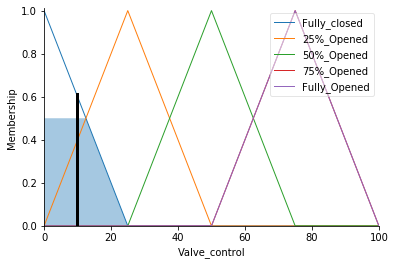

In [34]:
Dam.input['Water_level'] = 2.5
Dam.input['Flow_rate'] = 9800

# Crunch the numbers
Dam.compute()
#Once computed, we can view the result as well as visualize it.

print(Dam.output['Valve_control'])
Valve_control.view(sim=Dam)